# Predict the age of a child using tile / poem text

- poem text corpora PoKi: A Large Dataset of Poems by Children(https://arxiv.org/abs/2004.06188v3)


## Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('./drive/MyDrive/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [ ]:
data = pd.read_csv('poem_train', encoding = 'utf8', sep = '\t')

print(f'Train data shape: {data.shape}\n\n')
print(f'Columns: {data.columns}')

Train data shape: (10000, 54)


Columns: Index(['id', 'age', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08',
       'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'title', 'text'],
      dtype='object')


#### check NA

In [ ]:
data.isnull().sum()

,0
id,0
age,0
x01,0
x02,0
x03,0
x04,0
x05,0
x06,0
x07,0
x08,0


In [ ]:
# NA value in 'title' column
# will replace NA value in 'title' column with ''
data = data.fillna('')

#### handling \&apos;\



In [ ]:
import html

data['title'] = list(map(lambda x: html.unescape(x), data['title']))
data['text'] = list(map(lambda x: html.unescape(x), data['text']))


## Observe Data

### observe y label

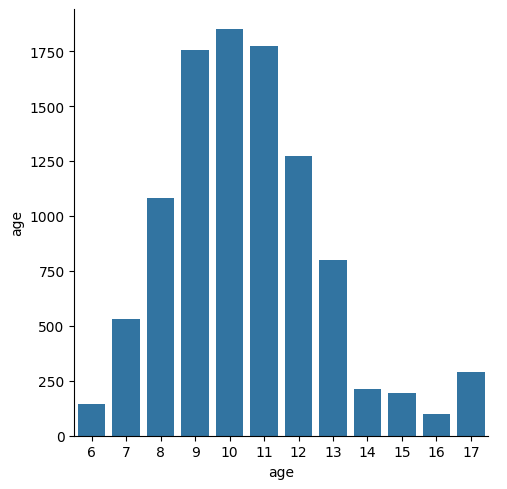

In [ ]:
age = data.groupby(['age'])['age'].count()
sns.catplot(x = age.index.copy(), y = age, kind = 'bar')

In [ ]:
print(f'Mean Age: {np.mean(data["age"])}\n',
      f'Median Age: {np.median(data["age"])}\n')

Mean Age: 10.5048
 Median Age: 10.0



In [ ]:
from scipy.stats import shapiro

In [ ]:
statistics, p_value = shapiro(data['age'], nan_policy = 'omit')

if p_value <= 0.01:
  print(f'Age distribution follow Gaussian with p_value {p_value}')
else:
  print(f'Age distribution does not follow Gaussian with p_value {p_value}')

Age distribution follow Gaussian with p_value 2.727376925602361e-50


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


#### unique letters in title (encoding error?)

In [ ]:
titles = [title for title in data['title'].copy()]
titles

['Rainbows',
 'Together',
 'I Like School',
 'A something',
 'THE  LITTLE   BUNNY',
 'Tell they made me see.',
 'September 11, 2001',
 'My Goddess',
 'All I ever wanted',
 'Bob  rules   the    World',
 'Me, myself and I',
 'What is Gray?',
 "There's A Monster in the Shower!",
 'I am a Poet',
 'Poem',
 'My style poem',
 'Sounds of gymnastics',
 'Kamryn',
 'My Dog',
 'Goodbye Poems, True Loves Grasp',
 'Space Poem',
 'Love',
 'My Life Salvation',
 'The Big Balloon',
 'Love',
 'Love!!',
 'Time Machine!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 'A big fat brown dog',
 'Snow',
 'MY DOG DOES MY HOMEWORK',
 'Nick   Carter  My  sun shine',
 'Duller',
 'Pride of my department(english)',
 'Canaries',
 'The Sea Hurricane',
 'Basketball',
 'Shopping',
 'The Gift Of Gobbles',
 'Grapes',
 'Swinging',
 'Where to begin?',
 'You told me',
 'Friends',
 'Dream',
 'The Shadow',
 'Friendship',
 'Pal',
 'A haiku',
 'If Poeple Could Fly',
 'Dream',
 'THERE IS NO SMILE BIGGER THEN MINE',
 'Can Man',
 'Mothers poem',

In [ ]:
letters_title = sorted(set([l for title in titles for token in title.split() for l in token]))

In [ ]:
print(*letters_title)

! # $ & ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; = ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { } ~ ¢ © ¸ » ½ ¾ Â Ã í ’ “ ”


#### unique letters in poem text

In [ ]:
data.columns

Index(['id', 'age', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08',
       'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'title', 'text'],
      dtype='object')

In [ ]:
texts = [text for text in data['text'].copy()]
texts

['shimmering, gleaming colourful colours sky high pretty and bright',
 'we smile  we laugh we play we are best friends',
 'i like school,  school is cool,  people are tall,  people are small,  but most of all,  school is a ball. ',
 "a tree stands by a pond a pond without a ripple at all and inside that pond is a fish a fish without any feeling at all and inside that fish is an eye  an eye that see's everything and that everything is you and you are something a something that looks through an eye at a tree,  a pond,  a fish,  a ripple, a something",
 'i saw a little bunny and it looked so funny.   and it  was so sunny.                                    and he was a cute  bunny.  and he loved to eat  honey.   the  bunny ate  too  much honey.   then his stomach felt seriously funny!',
 "i wake up every morning and i look in the mirror.  i dont like what i see.  i wish i could just disappear.  all of the people i know say i'm really fat and ugly.  thay say it so much i'm starting to beli

In [ ]:
letters_text = sorted(set([l for text in texts for token in text.split() for l in token]))

In [ ]:
print(*letters_text)

! # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? [ \ ] ^ _ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { | } ~   ¡ ¤ ¦ § © ­ ¯ ° ± ´ ¶ ¸ ¼ ½ ¾ ¿ â ã í ï œ ˜ – — ‘ ’ “ ” € ™


compare letters_title and letters_text

In [ ]:
print(*sorted(list(set(letters_text) - set(letters_title))))

% ' < > _ |   ¡ ¤ ¦ § ­ ¯ ° ± ´ ¶ ¼ ¿ â ã ï œ ˜ – — ‘ € ™


#### extract and save special symbols

In [ ]:
import re
symbols_title = [re.match('\W', letter).group() for letter in letters_title if re.match('\W', letter) ]
symbols_text = [re.match('\W', letter).group() for letter in letters_text if re.match('\W', letter) ]

symbols = sorted(set(symbols_title).union(set(symbols_text)))

In [ ]:
file = 'special_symbols.txt'

with open(file, mode = 'w') as f:
  for symbol in symbols:
    f.write(f'\\{symbol}' + '\n')

#### observing titles

In [ ]:
import random
idx = random.sample(range(10000), 50)

In [ ]:
data['title'][idx]

,title
9267,messed up
4737,Teachers
2613,The love i lost
7690,Katy's Cats
3511,BRUSSEL SPOUT 2D
1596,My Dragon
5660,Seventh grade smells like socks.
4746,SADIE
1973,Morning Evening?
7971,My Favorite Dogs


#### Features by age EDA - titles
(1) title - length

In [ ]:
data.shape[0] == len(titles)

True

In [ ]:
title_length = [len(title.split()) for title in titles]

generate 'train' dataframe
- dataframe in which new features are added

In [ ]:
train = data.copy()
train['title_length'] = title_length

In [ ]:
train.groupby('age')['title_length'].mean()

,title_length
age,
6,2.310345
7,2.301318
8,2.301939
9,2.319088
10,2.310979
11,2.177001
12,2.292683
13,2.339174
14,2.528302


In [ ]:
train.groupby('age')['title_length'].max() - train.groupby(['age'])['title_length'].min()

,title_length
age,
6,5
7,7
8,9
9,8
10,8
11,8
12,8
13,8
14,9


In [ ]:
train.groupby('age')['title_length'].median()

,title_length
age,
6,2.0
7,2.0
8,2.0
9,2.0
10,2.0
11,2.0
12,2.0
13,2.0
14,2.0


title length distribution by age - visualization

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'title_length', data = train, inner = 'box')
plt.title('Title length distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

ValueError: Could not interpret value `title_length` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

/tmp/ipython-input-82-3103436644.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


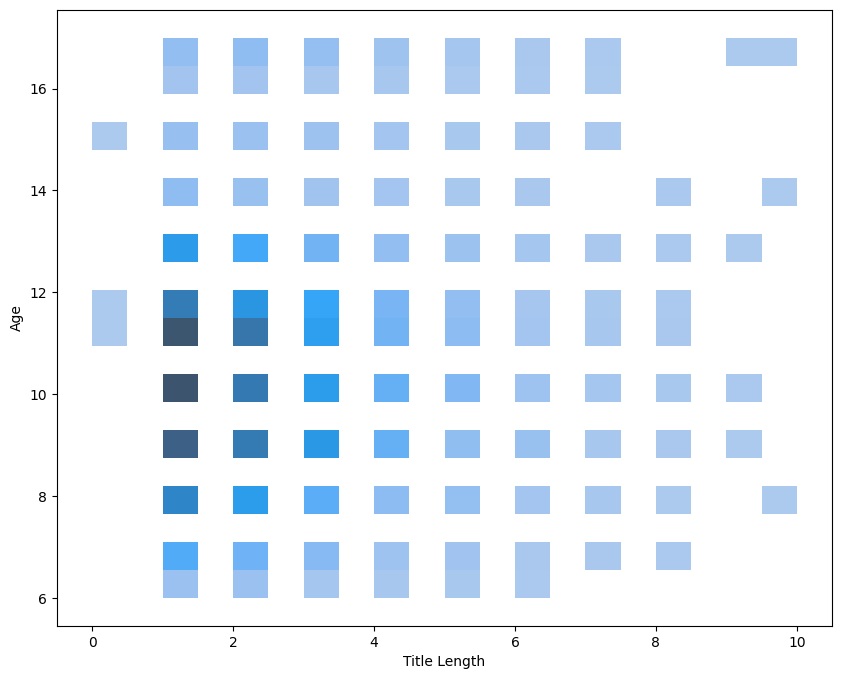

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(
    data = train,
    y = 'age',
    x = 'title_length',
    multiple = 'dodge',
    bins = 20,
    kde = False,
    palette = 'Set2',
)
plt.xlabel('Title Length')
plt.ylabel('Age')
plt.show()

(1) title - length > turns out to be not meaning ful

(2) title - case (all letters capital?)

In [ ]:
capital = [title.isupper() for title in titles]
train['capital'] = capital

In [ ]:
train[['age', 'capital']]

,age,capital
0,11,False
1,10,False
2,9,False
3,13,False
4,8,True
...,...,...
9995,10,False
9996,8,False
9997,8,False
9998,10,False


In [ ]:
train.groupby(['age'])['capital'].mean()

,capital
age,
6,0.048276
7,0.073446
8,0.079409
9,0.067236
10,0.063818
11,0.069899
12,0.048780
13,0.047559
14,0.033019


(2) title - case > no useful

(3) title - articles (includes the?)

In [ ]:
import re
pattern = re.compile('^the', flags = re.IGNORECASE)

articles = [bool(pattern.search(title)) for title in titles]

In [ ]:
sum(articles)

1167

In [ ]:
train['articles'] = articles
train.groupby(['age'])['articles'].mean()

,articles
age,
6,0.131034
7,0.114878
8,0.122807
9,0.131624
10,0.117361
11,0.108794
12,0.103068
13,0.108886
14,0.122642


(3) title - articles (includes ^the?) > also not meaningful

(4) title - singular person (includes I, Me, My?)

In [ ]:
pattern = re.compile('\\b(I|me|my)', re.IGNORECASE)
singular = [bool(pattern.search(title)) for title in titles]

In [ ]:
sum(singular)

2621

In [ ]:
train['singular'] = singular
train.groupby(['age'])['singular'].mean()

,singular
age,
6,0.206897
7,0.265537
8,0.263158
9,0.245584
10,0.259059
11,0.254791
12,0.281668
13,0.280350
14,0.273585


(4) title - singular person (includes I, Me, My?) NO😭😭

(5) title - special symbols

In [ ]:
pattern = re.compile('\W', flags = re.IGNORECASE)
special_symbols = [bool(pattern.search(title)) for title in titles]

In [ ]:
sum(special_symbols)

6482

In [ ]:
train['special_symbols'] = special_symbols

In [ ]:
train.groupby(['age'])['special_symbols'].mean()

,special_symbols
age,
6,0.689655
7,0.655367
8,0.637119
9,0.656980
10,0.630070
11,0.621759
12,0.650669
13,0.659574
14,0.650943


it seems like there exist a difference but not yet sure how i can decide it is significant

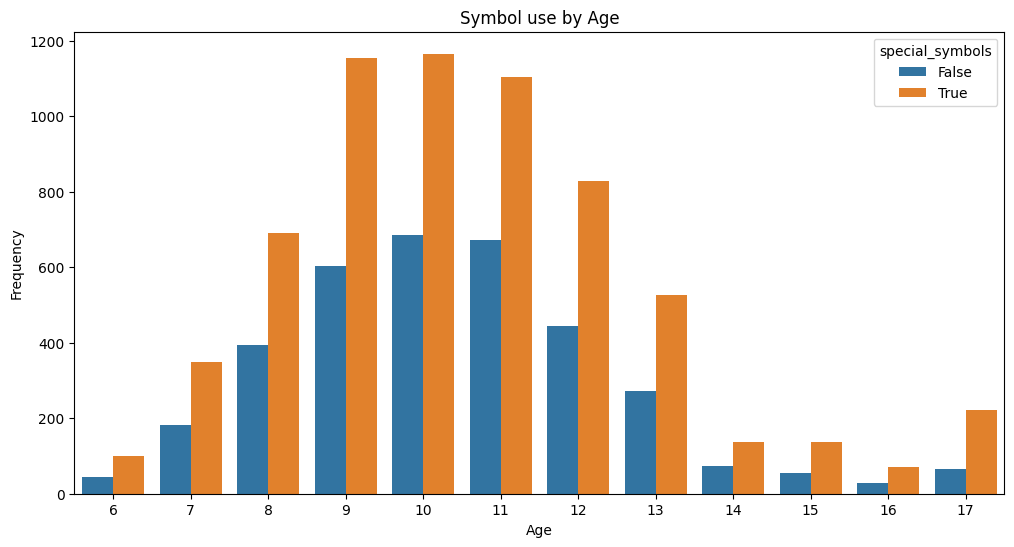

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(data = train, x = 'age', hue = 'special_symbols')
plt.title('Symbol use by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

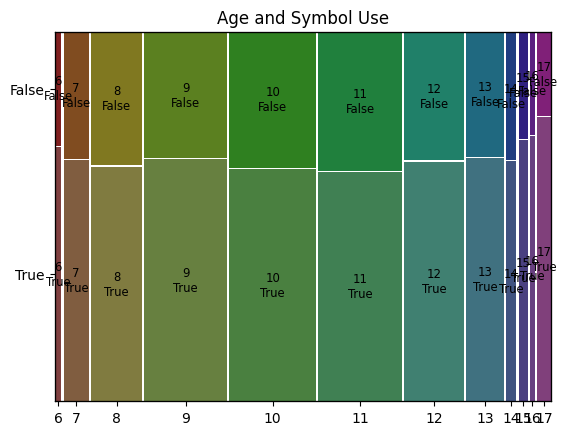

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

train_sorted = train.sort_values('age')

mosaic(train_sorted, ['age', 'special_symbols'])
plt.title('Age and Symbol Use')
plt.show()

#### observing text

In [ ]:
import random
idx = random.sample(range(10000), 50)

In [ ]:
data.loc[idx[0], 'text']

"i am me.  i don't follow trends.  i am who i am and you can't  change that.   i am diffrent.  i have lots of self-confidence and i have lots of friends.  i am who i am and you can't change that.   that is who i am and what i am so don't bug me about it .  i  am having a bad day. "

In [ ]:
data.loc[idx[-1], 'text']

"in the end high school goes by like a dream grades,  friends,  enemies,  drama,  sports,  and teams all seem like one big blurr while i'm sitting on this graduation stage scared for what is ahead and scared for my future  i look around me at all the students of my twenty-ten class in a couple years they will all just be a distant memory as we disperse into the world and try our own things some will fail others will live their own dreams"

In [ ]:
data.loc[idx[10], 'text']

'my teeth are blue,  my tongue is orange,  and my nose is red.  my face looks like pea soup,  and my legs are too long,  and my arms are like stubby mushrooms,  and my body is the shape of a watermelon. '

In [ ]:
data.loc[idx, ['age', 'text']].groupby(['age'])['text'].apply(lambda x: x)

age      
7    5766    my elafant is very fellafant and clelafant. my...
8    858     when i awoke one morning,  a stork was on my h...
     1203    fall          colors,  red,        orange,  ye...
     8777    i'm hungry so that i will have a piece of peag...
     9119    s. aturday fun be p. roud of sports o. lympics...
     8478    it is hard and brown it is always found  it is...
9    4396    me and him him and me were always together as ...
     1322    one summers day                       a park w...
     9195    she is very nice and she likes to hunt mice sh...
     501     every birthday boys dream is to have presents....
     3266    brothers,  brothers everywhere they always wan...
     2203    hello joe my name is moe i eat jojos you are a...
     8717    scatch scatch,  she scatches on the door to co...
     769     when i awoke one morning, a dog was on my head...
10   7327    i am me.  i don't follow trends.  i am who i a...
     6070    scared to fall can do lots of tricks off the j...
     2296    who is chocolate? chocolate is my pet grizzly ...
     9540    someday i will be right,  someday i will be wr...
     9025    ball in my hands.  fans in the stands.  people...
     8603    she stands alone,  yet is controlled like a do...
     1985    one morning a golden bear was on my head and i...
     4990    o, great glasses,      when you look in the mi...
     2904    once i had a question it was a question that i...
     2069    you think of life as nothing till you meet the...
11   4634    my friends are so anoying,  the bug me and won...
     4605    when the world is in your mind and it won't ge...
     4199    boxes hold a  different sight,   you can carry...
     8906    i like to ride ride a horse that can fly high ...
     4005    colin indiana michele,  dean  sydney ,  kelsie...
     5836    when i go to the races to watch my dad race i ...
     2002    the turtle is in no rush to go.    it can't ru...
     2780    sometimes iâ’m happy,  sometimes iâ’m sad,   s...
     4445    laughter ,  it bubbles up inside and comes bur...
     231     we walked in the field . . . &lt;br&gt;looked ...
     3177    on saturday i started a new basketball season ...
12   8688    on easter i drive by a yard to see kids lookin...
     1252    he is fluffy on his tail like my hair on my he...
     2004    i don't care if it's a skirt or a dress my clo...
     7944    my teeth are blue,  my tongue is orange,  and ...
     4882    bystander  standing back  watching,  hearing, ...
     9582    cold ocean splashing salty waters on my skin w...
     1753    i awoke one morining and a bug was on my head....
     4073    to all the people of verona,  hear ye,  hear y...
     5934    wind begins softly,  like a whisper,  cool aga...
     5695    sometime during the winter everything turns so...
     5798    never borrow never lend unless you are sure of...
13   9691    i woke up put my clothes on and pulled up my h...
     218     the joy of chocolate cities and streets as i h...
15   5583    roses are red  violet are blue honey is sweet ...
17   2705    in the end high school goes by like a dream gr...
Name: text, dtype: object

In [ ]:
texts[800]

'lake            calm,  peaceful       fishing,  swimming,  sailing           fun to make splashes                pond'

In [ ]:
texts[800].count(' ')

55

In [ ]:
texts[500].count(' ')

89

In [ ]:
texts[500]

'the tree outside my window i climb it all the time it never seems to break that,  i do not mind  it hangs over the lawn its big and brown and tall the leaves on that tree of mine are big and small and all colors combined  so now you know about my tree oh that silly old climbing tree the one that never laughs at me with its branches in the sky  pointing towards the clouds looking like a giant there it stands all mine'

In [ ]:
texts[800].count(' ') / len(texts[800].split())

5.0

In [ ]:
texts[500].count(' ') / len(texts[500].split())

1.0348837209302326

#### Features by age EDA - text

In [ ]:
train = data.copy()

manage stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
print(*stop_words, sep = '\n')

a
about
above
after
again
against
ain
all
am
an
and
any
are
aren
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
couldn
couldn't
d
did
didn
didn't
do
does
doesn
doesn't
doing
don
don't
down
during
each
few
for
from
further
had
hadn
hadn't
has
hasn
hasn't
have
haven
haven't
having
he
he'd
he'll
her
here
hers
herself
he's
him
himself
his
how
i
i'd
if
i'll
i'm
in
into
is
isn
isn't
it
it'd
it'll
it's
its
itself
i've
just
ll
m
ma
me
mightn
mightn't
more
most
mustn
mustn't
my
myself
needn
needn't
no
nor
not
now
o
of
off
on
once
only
or
other
our
ours
ourselves
out
over
own
re
s
same
shan
shan't
she
she'd
she'll
she's
should
shouldn
shouldn't
should've
so
some
such
t
than
that
that'll
the
their
theirs
them
themselves
then
there
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
ve
very
was
wasn
wasn't
we
we'd
we'll
we're
were
weren
weren't
we've
what
when
where
which
while
who
whom
why
will
with
won
won't
wouldn
wouldn't
y
you
you'd
you'

Since analysis target is poem text, better to keep all the function words

text length(whole text, token counts)

In [ ]:
length_text_token = [len(text.split()) for text in train['text']]
train['text_length'] = length_text_token

In [ ]:
train[['text', 'text_length']]

,text,text_length
0,"shimmering, gleaming colourful colours sky hig...",9
1,we smile we laugh we play we are best friends,10
2,"i like school, school is cool, people are ta...",20
3,a tree stands by a pond a pond without a rippl...,66
4,i saw a little bunny and it looked so funny. ...,39
...,...,...
9995,new york city big and wide. new york city la...,18
9996,people have been doing math for many years but...,54
9997,one day my dad made hot tea and i said yippie....,27
9998,"there was a camel in my house and , he was ch...",56


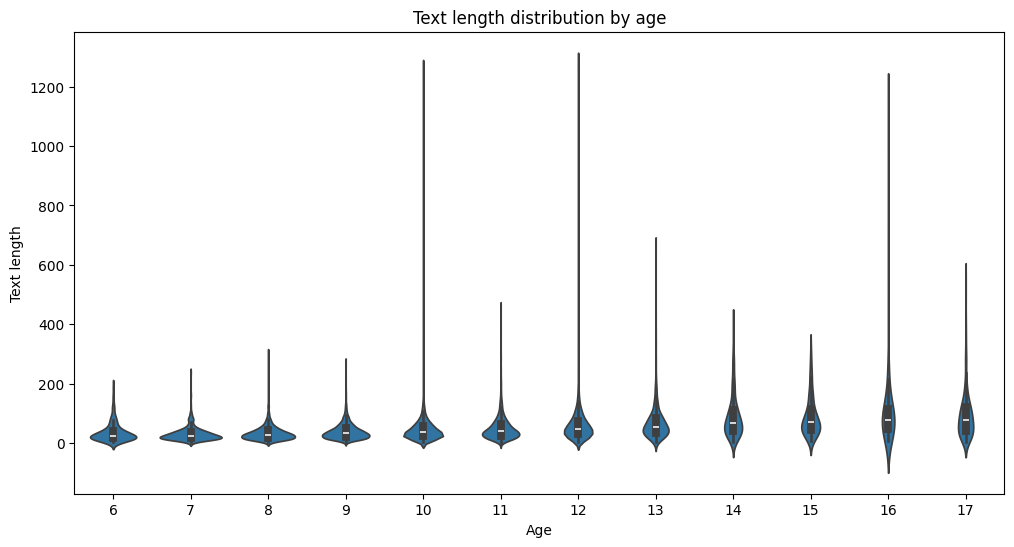

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'text_length', data = train, inner = 'box')
plt.title('Text length distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

In [ ]:
def get_non_outlier_index(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # 이상치가 아닌 행의 index만 반환
    return df[(df[column] >= lower) & (df[column] <= upper)].index


In [ ]:
index = get_non_outlier_index(train, 'text_length')
train_text_length = train.iloc[index, :]

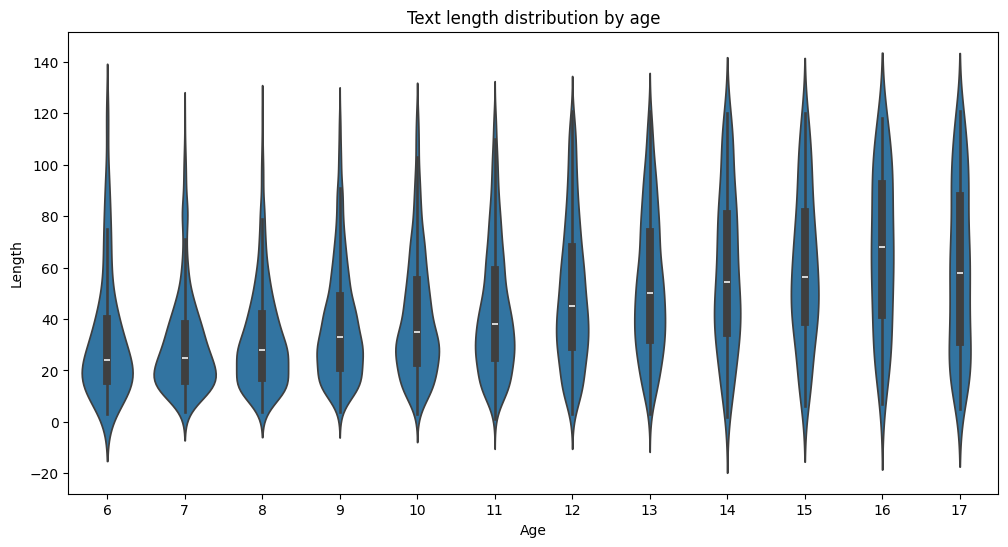

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'text_length', data = train_text_length, inner = 'box')
plt.title('Text length distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

text length(whole text, line counts)

before then, defining a 'LINE'

In [ ]:
sample = [len(text.split('\n')) for text in train['text']]

import collections
collections.Counter(sample)

In [ ]:
sample = [len(text.split('\t')) for text in train['text']]
collections.Counter(sample)

Counter({1: 10000})

In [ ]:
sample = [len(text.split(' ')) for text in train['text']]
collections.Counter(sample)

Counter({9: 45,
         11: 82,
         26: 132,
         70: 48,
         87: 49,
         90: 46,
         153: 5,
         144: 12,
         34: 163,
         30: 153,
         42: 128,
         57: 102,
         15: 141,
         35: 166,
         55: 101,
         63: 71,
         54: 77,
         67: 64,
         97: 40,
         5: 14,
         111: 24,
         165: 10,
         24: 130,
         17: 158,
         95: 27,
         25: 161,
         10: 59,
         38: 138,
         12: 102,
         143: 15,
         33: 170,
         72: 65,
         60: 83,
         130: 13,
         68: 47,
         142: 16,
         184: 6,
         46: 112,
         268: 3,
         168: 5,
         3: 7,
         32: 155,
         22: 141,
         21: 129,
         14: 146,
         147: 9,
         161: 10,
         44: 124,
         182: 6,
         209: 3,
         100: 34,
         65: 75,
         126: 14,
         31: 149,
         74: 54,
         56: 72,
         106: 29,
    

In [ ]:
sample = [len(text.split('  ')) for text in train['text']]
collections.Counter(sample)

Counter({1: 1823,
         2: 1180,
         6: 615,
         5: 761,
         29: 15,
         9: 337,
         22: 49,
         14: 157,
         8: 487,
         10: 271,
         17: 89,
         3: 972,
         20: 61,
         7: 577,
         4: 953,
         11: 247,
         12: 211,
         19: 61,
         110: 2,
         25: 32,
         15: 102,
         41: 8,
         16: 127,
         35: 10,
         30: 14,
         48: 4,
         24: 44,
         13: 186,
         39: 9,
         27: 36,
         28: 28,
         45: 11,
         169: 1,
         34: 19,
         36: 14,
         18: 100,
         21: 54,
         76: 4,
         100: 3,
         153: 1,
         26: 40,
         47: 3,
         37: 8,
         88: 2,
         38: 11,
         277: 1,
         40: 11,
         67: 3,
         56: 3,
         23: 45,
         31: 19,
         44: 11,
         189: 1,
         225: 1,
         248: 2,
         32: 14,
         50: 4,
         80: 1,
         33: 6,

No, defininga line is too hard

word length(with function words, mean)

In [ ]:
tokens = [text.split() for text in train['text']]
train['tokens'] = tokens

In [ ]:
word_length = [round(np.mean([len(word) for word in token]), 3) for token in train['tokens']]
train['word_length'] = word_length

In [ ]:
train[['text', 'word_length']]

,text,word_length
0,"shimmering, gleaming colourful colours sky hig...",6.333
1,we smile we laugh we play we are best friends,3.600
2,"i like school, school is cool, people are ta...",4.050
3,a tree stands by a pond a pond without a rippl...,3.788
4,i saw a little bunny and it looked so funny. ...,3.795
...,...,...
9995,new york city big and wide. new york city la...,3.389
9996,people have been doing math for many years but...,3.352
9997,one day my dad made hot tea and i said yippie....,3.222
9998,"there was a camel in my house and , he was ch...",3.625


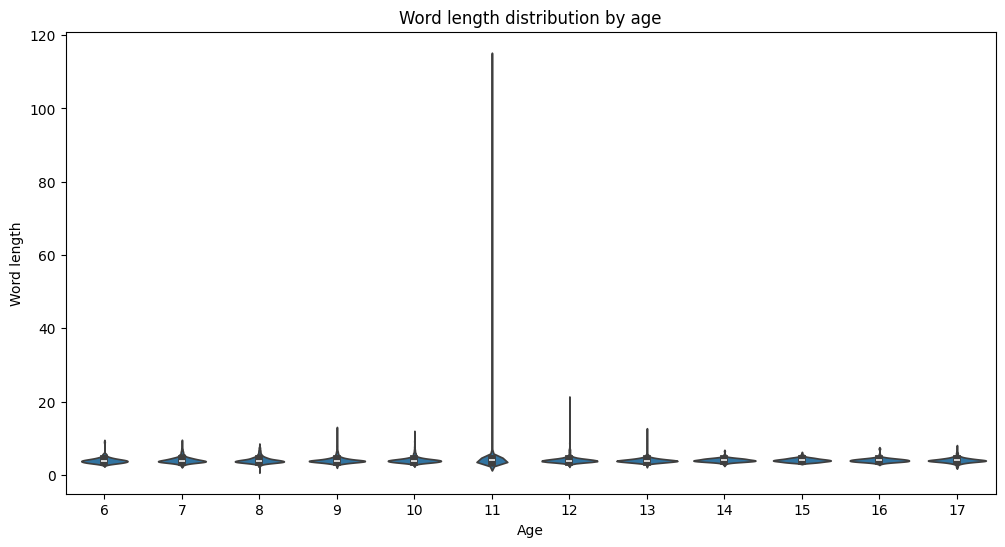

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'word_length', data = train)
plt.title('Word length distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

In [ ]:
index = get_non_outlier_index(train, 'word_length')
train_word_length = train.iloc[index, :]

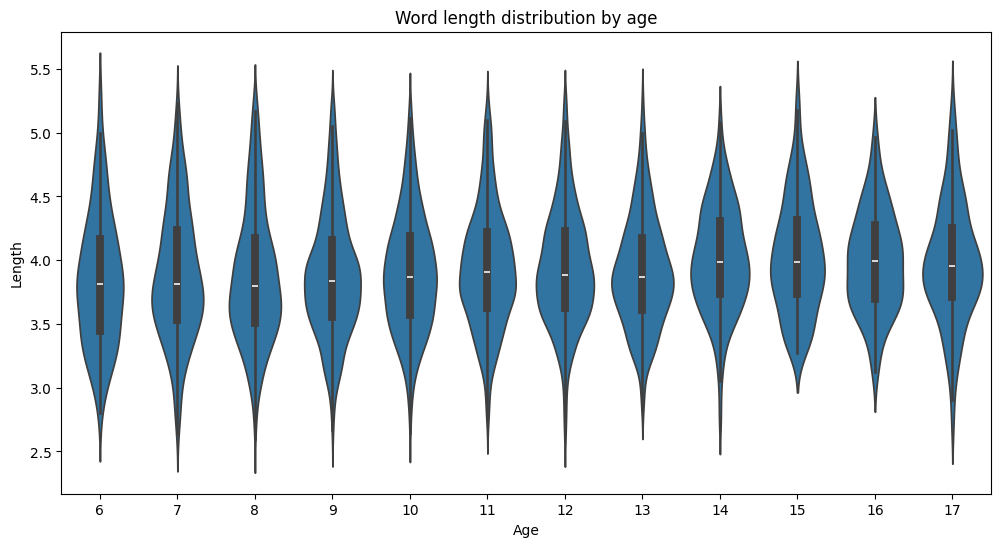

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'word_length', data = train_word_length)
plt.title('Word length distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

word length(without function words, mean)

In [ ]:
tokens_content = [[token for token in text.split() if token not in stop_words] for text in train['text'] ]
train['tokens_content'] = tokens_content

In [ ]:
word_length_content = [round(np.mean([len(word) for word in token]), 3) for token in train['tokens_content']]
train['word_length_content'] = word_length_content

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
train.columns

Index(['id', 'age', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08',
       'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'title', 'text', 'tokens', 'tokens_content',
       'text_length', 'word_length', 'word_length_content'],
      dtype='object')

In [ ]:
train.iloc[:, -8:]

,x50,title,text,tokens,tokens_content,text_length,word_length,word_length_content
0,-0.026471,Rainbows,"shimmering, gleaming colourful colours sky hig...","[shimmering,, gleaming, colourful, colours, sk...","[shimmering,, gleaming, colourful, colours, sk...",9,6.333,6.750
1,0.040054,Together,we smile we laugh we play we are best friends,"[we, smile, we, laugh, we, play, we, are, best...","[smile, laugh, play, best, friends]",10,3.600,5.000
2,-0.034959,I Like School,"i like school, school is cool, people are ta...","[i, like, school,, school, is, cool,, people, ...","[like, school,, school, cool,, people, tall,, ...",20,4.050,5.455
3,-0.018892,A something,a tree stands by a pond a pond without a rippl...,"[a, tree, stands, by, a, pond, a, pond, withou...","[tree, stands, pond, pond, without, ripple, in...",66,3.788,5.750
4,0.038582,THE LITTLE BUNNY,i saw a little bunny and it looked so funny. ...,"[i, saw, a, little, bunny, and, it, looked, so...","[saw, little, bunny, looked, funny., sunny., c...",39,3.795,5.263
...,...,...,...,...,...,...,...,...
9995,0.011024,New york city,new york city big and wide. new york city la...,"[new, york, city, big, and, wide., new, york, ...","[new, york, city, big, wide., new, york, city,...",18,3.389,3.769
9996,-0.023536,Math the right way,people have been doing math for many years but...,"[people, have, been, doing, math, for, many, y...","[people, math, many, years, know, wrong:, 4, a...",54,3.352,3.500
9997,0.060530,Hot tea,one day my dad made hot tea and i said yippie....,"[one, day, my, dad, made, hot, tea, and, i, sa...","[one, day, dad, made, hot, tea, said, yippie.,...",27,3.222,3.867
9998,-0.021524,The Camel in my House,"there was a camel in my house and , he was ch...","[there, was, a, camel, in, my, house, and, ,, ...","[camel, house, ,, chasing, mouse!again, clean,...",56,3.625,5.333


In [ ]:
train['tokens_content']

,tokens_content
0,"[shimmering,, gleaming, colourful, colours, sk..."
1,"[smile, laugh, play, best, friends]"
2,"[like, school,, school, cool,, people, tall,, ..."
3,"[tree, stands, pond, pond, without, ripple, in..."
4,"[saw, little, bunny, looked, funny., sunny., c..."
...,...
9995,"[new, york, city, big, wide., new, york, city,..."
9996,"[people, math, many, years, know, wrong:, 4, a..."
9997,"[one, day, dad, made, hot, tea, said, yippie.,..."
9998,"[camel, house, ,, chasing, mouse!again, clean,..."


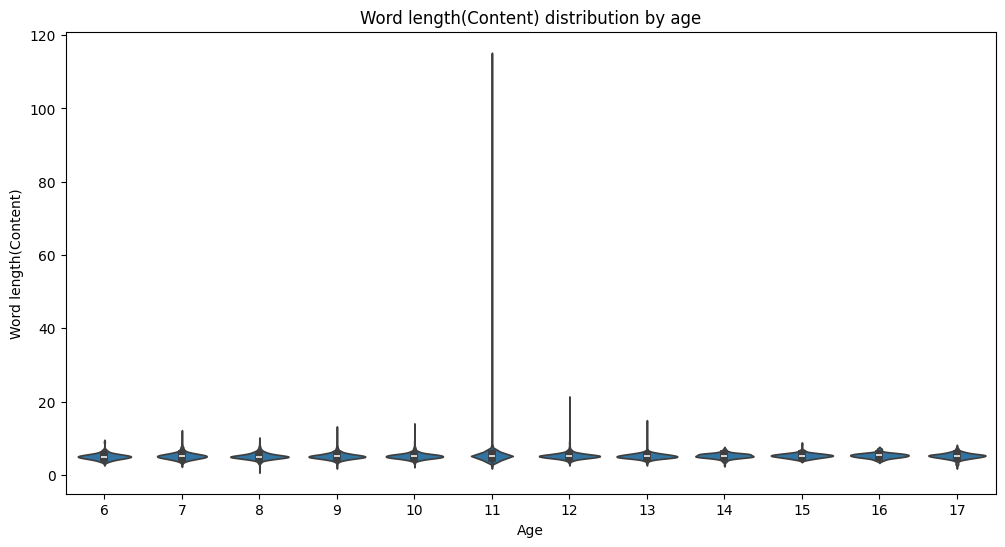

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'word_length_content', data = train)
plt.title('Word length(Content) distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

In [ ]:
index = get_non_outlier_index(train, 'word_length_content')
train_word_length_content = train.iloc[index, :]

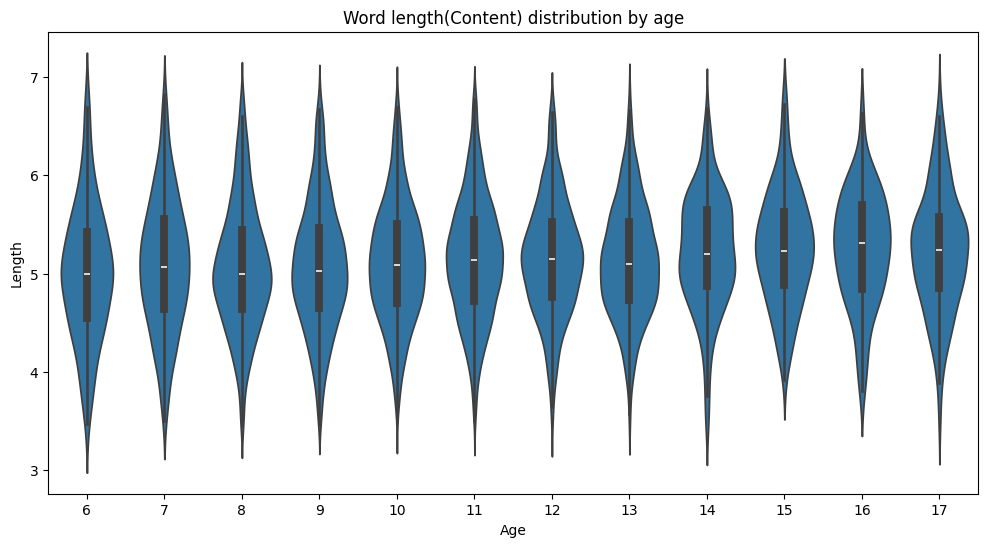

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'word_length_content', data = train_word_length_content)
plt.title('Word length(Content) distribution by age')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

type / token ratio

In [ ]:
n_type = [len(set(text.split())) for text in train['text']]
train['n_type'] = n_type

In [ ]:
train.columns

Index(['id', 'age', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08',
       'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'title', 'text', 'tokens', 'tokens_content',
       'text_length', 'word_length', 'word_length_content', 'n_type'],
      dtype='object')

In [ ]:
n_token = [len(tokens) for tokens in train['tokens']]
train['n_token'] = n_token

In [ ]:
train['tt_ratio'] = np.array(train['n_type']) / np.array(train['n_token'])

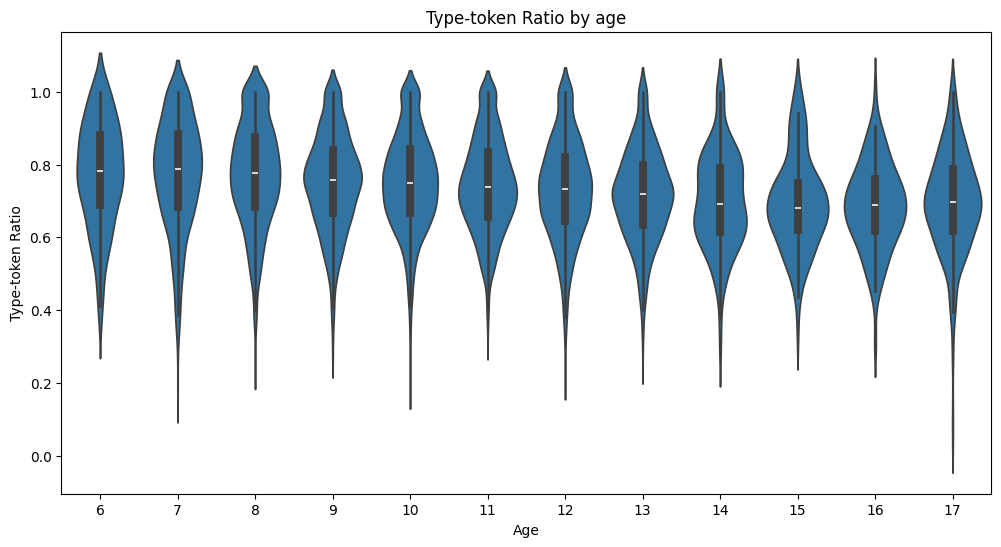

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'tt_ratio', data = train)
plt.title('Type-token Ratio by age')
plt.xlabel('Age')
plt.ylabel('Type-token Ratio')
plt.show()

use of white spaces

In [ ]:
num_space = [text.count(' ') for text in train['text']]
train['num_space'] = num_space

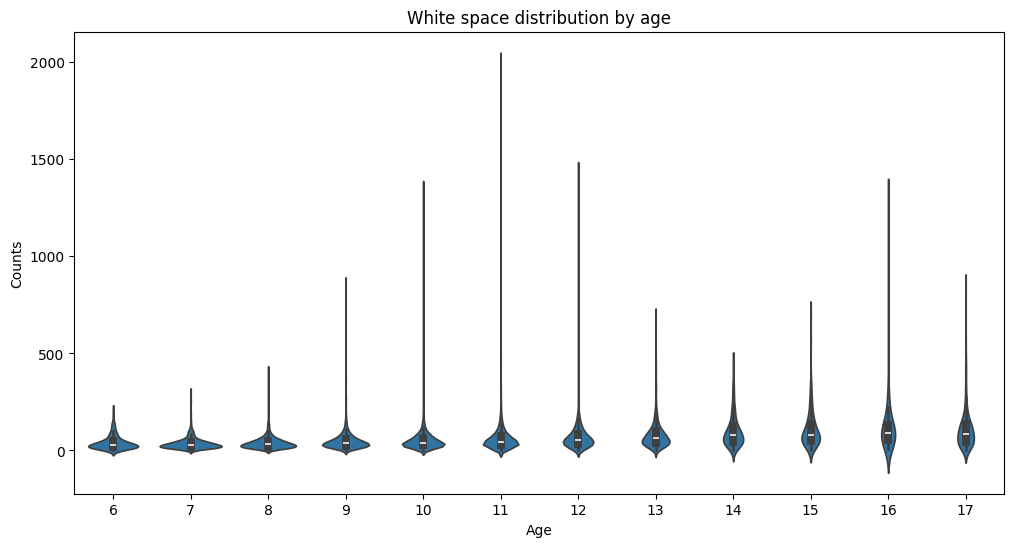

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'num_space', data = train)
plt.title('White space distribution by age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

outlier 처리하고 시각화

In [ ]:
def get_non_outlier_index(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # 이상치가 아닌 행의 index만 반환
    return df[(df[column] >= lower) & (df[column] <= upper)].index


In [ ]:
index = get_non_outlier_index(train, 'num_space')
train_space = train.iloc[index, :]

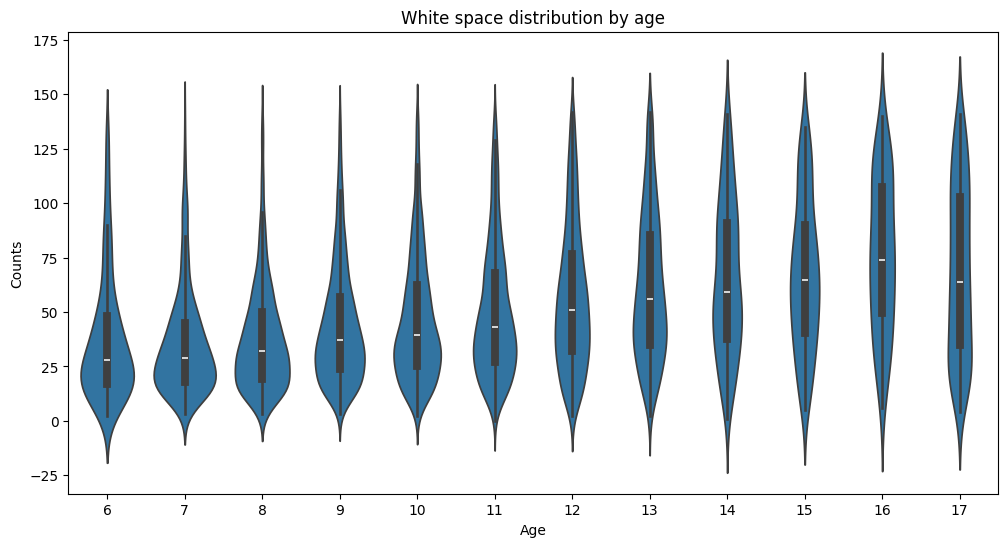

In [ ]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'age', y = 'num_space', data = train_space)
plt.title('White space distribution by age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()